### 1. Load Data

In [24]:
import gzip
import numpy as np
from keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("data/MNIST_data/train-images-idx3-ubyte.gz")
y_train = open_labels("data/MNIST_data/train-labels-idx1-ubyte.gz")

X_test = open_images("data/MNIST_data/t10k-images-idx3-ubyte.gz")
y_test = open_labels("data/MNIST_data/t10k-labels-idx1-ubyte.gz")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [23]:
#Labels are one-hot encoded

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

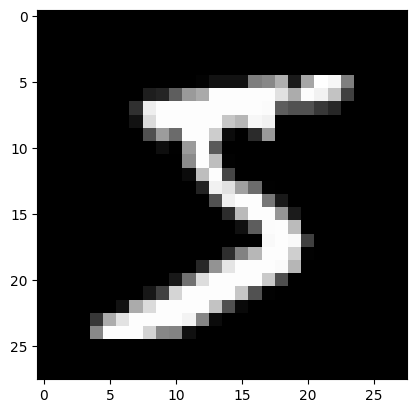

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="gray")

### 2. Configure Models

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

model.add(Conv2D(10, kernel_size=(3, 3), activation="sigmoid", input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train.reshape(60000, 28, 28, 1), y_train, epochs=10, batch_size=1000)



Epoch 1/10


60/60 [==============================] - 2s 17ms/step - loss: 2.1824 - accuracy: 0.5280
Epoch 2/10
60/60 [==============================] - 1s 16ms/step - loss: 0.8379 - accuracy: 0.7372
Epoch 3/10
60/60 [==============================] - 1s 16ms/step - loss: 0.5558 - accuracy: 0.8223
Epoch 4/10
60/60 [==============================] - 1s 17ms/step - loss: 0.4817 - accuracy: 0.8515
Epoch 5/10
60/60 [==============================] - 1s 16ms/step - loss: 0.3947 - accuracy: 0.8778
Epoch 6/10
60/60 [==============================] - 1s 16ms/step - loss: 0.3520 - accuracy: 0.8906
Epoch 7/10
60/60 [==============================] - 1s 16ms/step - loss: 0.2979 - accuracy: 0.9077
Epoch 8/10
60/60 [==============================] - 1s 15ms/step - loss: 0.2889 - accuracy: 0.9135
Epoch 9/10
60/60 [==============================] - 1s 16ms/step - loss: 0.2376 - accuracy: 0.9269
Epoch 10/10
60/60 [==============================] - 1s 17ms/step - loss: 0.2383 - accuracy: 0.9272


In [13]:
model = Sequential()

model.add(Conv2D(10, kernel_size=(9,9), activation="sigmoid", input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train.reshape(60000, 28, 28, 1), y_train, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 1s 15ms/step - loss: 0.7113 - accuracy: 0.7992
Epoch 2/10
60/60 [==============================] - 1s 15ms/step - loss: 0.2195 - accuracy: 0.9344
Epoch 3/10
60/60 [==============================] - 1s 15ms/step - loss: 0.1378 - accuracy: 0.9588
Epoch 4/10
60/60 [==============================] - 1s 15ms/step - loss: 0.1056 - accuracy: 0.9683
Epoch 5/10
60/60 [==============================] - 1s 15ms/step - loss: 0.0848 - accuracy: 0.9747
Epoch 6/10
60/60 [==============================] - 1s 16ms/step - loss: 0.0713 - accuracy: 0.9785
Epoch 7/10
60/60 [==============================] - 1s 15ms/step - loss: 0.0624 - accuracy: 0.9807
Epoch 8/10
60/60 [==============================] - 1s 15ms/step - loss: 0.0543 - accuracy: 0.9837
Epoch 9/10
60/60 [==============================] - 1s 15ms/step - loss: 0.0483 - accuracy: 0.9855
Epoch 10/10
60/60 [==============================] - 1s 15ms/step - loss: 0.0417 - accuracy: 0.9878


In [17]:
import keras.backend as K

data = K.eval(model.layers[0].weights[0])
print(data)

[[[[ 3.15285735e-02  5.01967184e-02  2.21430371e-03 -4.54561086e-03
     5.69574423e-02 -3.05048451e-02 -1.65111050e-02 -1.78535655e-02
    -3.25672552e-02  4.79212403e-02]]

  [[-2.03522146e-02  1.46827882e-03  1.87237505e-02  1.79497967e-03
     4.83449586e-02 -8.19021836e-02 -6.90908078e-03  8.09595808e-02
    -1.68410242e-02  1.07794665e-01]]

  [[-3.45367715e-02  9.59723517e-02  1.23133538e-02  2.74438374e-02
     5.50653711e-02  4.09888141e-02 -8.96652788e-02  2.12172344e-02
    -5.15888669e-02 -5.46479691e-03]]

  [[ 5.18178605e-02  3.40581648e-02  4.41991463e-02  1.97986141e-02
     2.51063406e-02 -2.33435091e-02 -9.44318715e-03 -5.04909270e-02
     2.27502882e-02  3.52803953e-02]]

  [[ 1.45789105e-02  6.32938594e-02  6.96761832e-02  6.29648566e-02
    -9.61304735e-03  6.18957058e-02  6.36952184e-03  7.49339387e-02
    -7.14902952e-02  9.74036455e-02]]

  [[ 5.76237701e-02  6.57510431e-03  3.73193249e-02 -3.22277099e-03
    -7.01104477e-02 -5.90154789e-02  8.24247673e-02  8.30

In [18]:
data[:, :, :, 0].reshape(9, 9)

array([[ 0.03152857, -0.02035221, -0.03453677,  0.05181786,  0.01457891,
         0.05762377, -0.03217353, -0.02107501,  0.06500284],
       [-0.01190577,  0.04041702, -0.05377321,  0.03519728, -0.03868377,
        -0.07811495,  0.00023496, -0.03805189,  0.06285201],
       [-0.01116391,  0.02278147, -0.05781133, -0.02305217,  0.00186523,
        -0.00607185, -0.0250779 ,  0.02116214, -0.06824984],
       [ 0.0497252 ,  0.0519201 ,  0.00098945, -0.0175925 , -0.02331339,
        -0.0569559 , -0.09257011, -0.06208401, -0.05377831],
       [-0.03372603,  0.01674324, -0.01661013, -0.05405098, -0.09106528,
        -0.11591545, -0.09779578, -0.0024453 , -0.02788041],
       [ 0.09985583,  0.01351975, -0.02657285, -0.12006818, -0.19145736,
        -0.04239814, -0.03577247,  0.04426696, -0.0066026 ],
       [ 0.06690665,  0.07335164, -0.18466231, -0.1577159 , -0.00085891,
         0.068601  ,  0.06391674,  0.00730224, -0.0088473 ],
       [-0.00757603, -0.01587221, -0.22390097, -0.07345025,  0

### 3. Results

In [25]:
# https://adamharley.com/nn_vis/cnn/3d.html

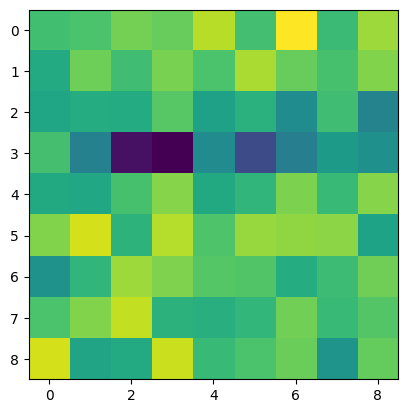

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(data[:, :, :, 3].reshape(9, 9))
plt.show()